In [65]:
import pandas as pd
import random as rnd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [66]:
df = pd.read_csv('../datasets/weather/jp_weather.csv',decimal=",")
df = df.drop('Value', axis = 1)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=["Date"])
df['Celsius'] = pd.to_numeric(df['Celsius'])
df['Celsius'] = df['Celsius'].round(2)


In [67]:
df

,Date,Station,Sub-Sector,Super Region,Time Level,Country,LON,Weather Statistics,Source,LAT,Celsius
38907,2018-05-17,ESASHI,GLOBAL DAILY WEATHER HISTORICAL DATA,GLOBAL WEATHER,DAILY,JAPAN,140.117,MEAN TEMPERATURE FOR THE DAY,WEATHER DATA CENTERS DAILY DATA,41.867,13.06
48907,2018-05-17,MATSUMOTO,GLOBAL DAILY WEATHER HISTORICAL DATA,GLOBAL WEATHER,DAILY,JAPAN,137.967,MEAN TEMPERATURE FOR THE DAY,WEATHER DATA CENTERS DAILY DATA,36.25,23.61
91907,2018-05-17,OTARU,GLOBAL DAILY WEATHER HISTORICAL DATA,GLOBAL WEATHER,DAILY,JAPAN,141.017,MEAN TEMPERATURE FOR THE DAY,WEATHER DATA CENTERS DAILY DATA,43.183,10.72
29907,2018-05-17,IIZUKA,GLOBAL DAILY WEATHER HISTORICAL DATA,GLOBAL WEATHER,DAILY,JAPAN,130.7,MEAN TEMPERATURE FOR THE DAY,WEATHER DATA CENTERS DAILY DATA,33.65,25.83
17907,2018-05-17,SUWA,GLOBAL DAILY WEATHER HISTORICAL DATA,GLOBAL WEATHER,DAILY,JAPAN,138.117,MEAN TEMPERATURE FOR THE DAY,WEATHER DATA CENTERS DAILY DATA,36.05,21.83
...,...,...,...,...,...,...,...,...,...,...,...
91223,2021-03-21,OTARU,GLOBAL DAILY WEATHER HISTORICAL DATA,GLOBAL WEATHER,DAILY,JAPAN,141.017,MEAN TEMPERATURE FOR THE DAY,WEATHER DATA CENTERS DAILY DATA,43.183,3.78
12223,2021-03-21,MOMBETSU,GLOBAL DAILY WEATHER HISTORICAL DATA,GLOBAL WEATHER,DAILY,JAPAN,143.35,MEAN TEMPERATURE FOR THE DAY,WEATHER DATA CENTERS DAILY DATA,44.35,2.00
3223,2021-03-21,HITOYOSHI,GLOBAL DAILY WEATHER HISTORICAL DATA,GLOBAL WEATHER,DAILY,JAPAN,130.75,MEAN TEMPERATURE FOR THE DAY,WEATHER DATA CENTERS DAILY DATA,32.217,10.78
62230,2021-03-21,HAMAMATSU,GLOBAL DAILY WEATHER HISTORICAL DATA,GLOBAL WEATHER,DAILY,JAPAN,137.703,MEAN TEMPERATURE FOR THE DAY,WEATHER DATA CENTERS DAILY DATA,34.75,15.56


In [99]:
#saving latitude and longitude to a list of dictionary
stations = df['Station'].unique()
Positions = []
for station in stations:
    #display(station ,df[df['Station'] == station][['LAT']][:1].values[0][0])
    Positions.append({'loc':[df[df['Station'] == station][['LAT']][:1].values[0][0], df[df['Station'] == station][['LON']][:1].values[0][0]],
                      'station':station})

In [104]:
# Making a map using the folium module
import folium
jp_map = folium.Map()

# Adding markers to the map
for position in Positions:
    marker = folium.Marker(location=position['loc'], popup=position['station']+" STATION")
    marker.add_to(jp_map)

# The last object in the cell always gets shown in the notebook
jp_map

In [34]:
# Japan mean temperature 
df.describe()

,Celsius
count,100000.000000
mean,15.402511
std,9.177219
min,-17.390000
25%,8.560000
50%,16.110000
75%,22.940000
max,35.890000


In [35]:
tokyo_df =  df[df['Station']=='TOKYO INTL'] 
tokyo_df.describe()

,Celsius
count,1000.000000
mean,17.345110
std,7.691579
min,1.560000
25%,10.390000
50%,17.280000
75%,23.780000
max,31.610000


Text(0.5, 1.0, 'Tokyo mean temp')

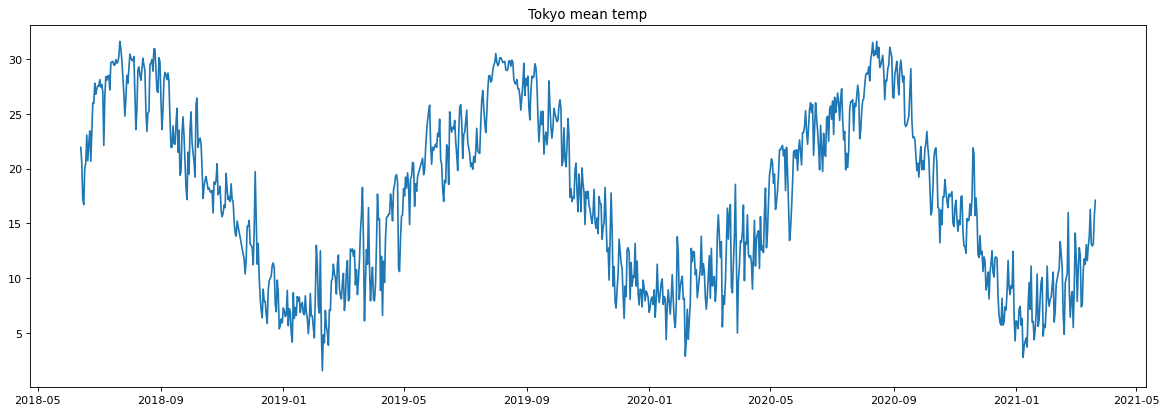

In [112]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tokyo_df['Date'], tokyo_df['Celsius'])
plt.title('Tokyo mean temp')